In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn import linear_model as lm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [5]:
def LinearRegression(X, y, epochs=100000, learning_rate=0.0001, ep=0.000001,
                     activation="gradient_descent", batch_size=1):
    m_current = np.zeros(X.shape[1])
    b_current = 0
    N = float(y.shape[0])
    mu = 0.9                 # momentum term
    error_rate = []
    iteration = []
    
    if activation == "gradient_descent":
        for i in range(epochs):
            y_current = np.dot(m_current, X.T) + b_current      
            
            m_gradient = -(2/N) * np.dot(X.T, (y - y_current))
            b_gradient = -(2/N) * sum(y - y_current)
            
            m_current = m_current - (learning_rate * m_gradient)
            b_current = b_current - (learning_rate * b_gradient)
            
            prediction = np.dot(m_current, X.T) + b_current
            rmse = sqrt(mean_squared_error(prediction, y_current))        
            
            error_rate.append(rmse)
            iteration.append(i)
            
            if rmse < ep:
                break    # break here

    elif activation == "sgd":
        for i in range(epochs):
            for j in range(0, int(N), batch_size):
                y_current = np.dot(m_current, X[j:j+batch_size].T) + b_current

                m_gradient = -(2/N) * np.dot(X[j:j+batch_size].T, (y[j:j+batch_size] - y_current))
                b_gradient = -(2/N) * sum(y[j:j+batch_size] - y_current)

                m_current = m_current - (learning_rate * m_gradient)
                b_current = b_current - (learning_rate * b_gradient)
            
                prediction = np.dot(m_current, X[j:j+batch_size].T) + b_current
                rmse = sqrt(mean_squared_error(prediction, y_current))        
                
                error_rate.append(rmse)
                iteration.append(i*(N/batch_size)+j)
                
                if rmse < ep:
                    break    # break here
                
    elif activation == "momentum":
        for i in range(epochs):
            for j in range(0, int(N), batch_size):
                y_current = np.dot(m_current, X[j:j+batch_size].T) + b_current

                m_gradient = -(2/N) * np.dot(X[j:j+batch_size].T, (y[j:j+batch_size] - y_current))
                b_gradient = -(2/N) * sum(y[j:j+batch_size] - y_current)

                if i == 0:
                    v_m = 0
                    v_b = 0

                v_m = mu * v_m + learning_rate * m_gradient
                v_b = mu * v_b + learning_rate * b_gradient

                m_current = m_current - v_m
                b_current = b_current - v_b        
                
                prediction = np.dot(m_current, X[j:j+batch_size].T) + b_current
                rmse = sqrt(mean_squared_error(prediction, y_current))        
                
                error_rate.append(rmse)
                iteration.append(i*(N/batch_size)+j)
                
                if rmse < ep:
                    break    # break here

    else:
        raise Exception("ERROR: Activation Function Not Found!")
    
    plt.plot(iteration,error_rate)
    return m_current, b_current

# White wine prediction

In [2]:
# Load training file
df = pd.read_csv('Files/winequality-white-training.csv', index_col=0)
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,8.7,0.23,0.32,13.4,0.044,35.0,169.0,0.99975,3.12,0.47,8.8,7
1,5.0,0.27,0.40,1.2,0.076,42.0,124.0,0.99204,3.32,0.47,10.1,6


In [3]:
y = df.iloc[:,-1]
y = y.values

X = df.drop(df.columns[-1], axis=1)
X = X.values

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X.shape, y.shape)

(3898, 11) (3898,)


0.7786202987860272
1.5420536991160445
2.286948161871913
3.04706739990207
3.784233338670005
Learning rate:  0.0001 RMSE_avg:  0.756846667734001
0.7770013618830405
1.5397503911702741
2.284021065151128
3.045384724965987
3.7814302871122245
Learning rate:  0.0005 RMSE_avg:  0.7562860574224449
0.7752660949314151
1.5359051574316114
2.2791245125727144
3.047379120158008
3.782101157869139
Learning rate:  0.001 RMSE_avg:  0.7564202315738278
0.7742163758003555
1.5330794621033084
2.2756814113457855
3.0539444177296327
3.7879534384387386
Learning rate:  0.005 RMSE_avg:  0.7575906876877477


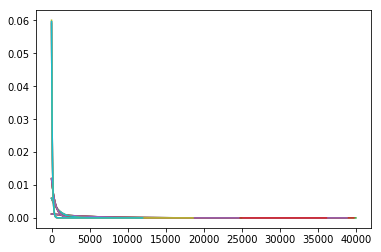

In [7]:
params = [0.0001, 0.0005, 0.001, 0.005]
for param in params:
    
    kf = KFold(n_splits=5, shuffle=True, random_state=25)
    rmse = 0
    
    for train_index, test_index in kf.split(X):
        train_x, test_x = X[train_index], X[test_index]
        train_y, test_y = y[train_index], y[test_index]

        gd = LinearRegression(train_x, train_y, learning_rate = param, activation="gradient_descent")
        prediction = np.dot(gd[0], test_x.T) + gd[1]
        
        rmse += sqrt(mean_squared_error(prediction, test_y))
        print(rmse)
        
    print("Learning rate: ", param, "RMSE_avg: ", rmse/5)

(array([-0.00224458, -0.18979693,  0.00075235,  0.24558395, -0.01869202,
         0.07064452, -0.02454865, -0.19793987,  0.06447404,  0.05860579,
         0.34684212]), 5.879681835453752)

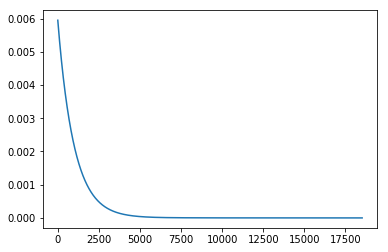

In [11]:
lin_reg_model = LinearRegression(X, y, learning_rate = 0.0005, activation="gradient_descent")
lin_reg_model

In [58]:
# Load solution file
df2 = pd.read_csv('Files/winequality-white-parameters.csv', index_col=0)
df2.head(2)

,parameter
Id,
0,0
1,0


In [59]:
df2.iloc[0,:] = lin_reg_model[1]

for i in range(1, df2.shape[0]):
    df2.iloc[i,:] = lin_reg_model[0][i-1]

df2

,parameter
Id,
0,5.879682
1,-0.002245
2,-0.189797
3,0.000752
4,0.245584
5,-0.018692
6,0.070645
7,-0.024549
8,-0.197940


In [60]:
df2.to_csv('winequality-white-parameters.csv')

In [61]:
# Load test file
df3 = pd.read_csv('Files/winequality-white-testing.csv', index_col=0)
df3.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Id,,,,,,,,,,,
0,7.0,0.310,0.31,9.1,0.036,45.0,140.0,0.99216,2.98,0.31,12.0
1,7.3,0.155,0.49,1.3,0.039,34.0,136.0,0.99260,3.14,0.77,10.5


In [62]:
X_test = df3.values
X_test = scaler.fit_transform(X_test)

print(X_test.shape)

(1000, 11)


In [63]:
lin_reg_pred = np.dot(lin_reg_model[0], X_test.T) + lin_reg_model[1]
lin_reg_pred.shape

(1000,)

In [64]:
df4 = pd.read_csv('Files/winequality-white-solution.csv', index_col=0)
df4.head(2)

,quality
Id,
0,0
1,0


In [65]:
df4['quality'] = lin_reg_pred

In [66]:
df4.to_csv('winequality-white-solution.csv')

# Red wine prediction

In [85]:
# Load training file
df5 = pd.read_csv('Files/winequality-red-training.csv', index_col=0)
df5.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,9.1,0.60,0.00,1.9,0.058,5.0,10.0,0.9977,3.18,0.63,10.4,6
1,7.9,0.52,0.26,1.9,0.079,42.0,140.0,0.9964,3.23,0.54,9.5,5


In [86]:
yr = df5.iloc[:,-1]
yr = yr.values

Xr = df5.drop(df5.columns[-1], axis=1)
Xr = Xr.values

In [87]:
Xr = scaler.fit_transform(Xr)

print(Xr.shape, yr.shape)

(1199, 11) (1199,)


0.6245934684333971
1.2876183452194907
1.9650291456161395
2.570791212616469
3.235014333248314
Learning rate:  0.0005 RMSE_avg:  0.6470028666496628


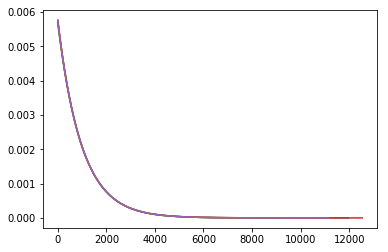

In [71]:
params = [0.0005]
for param in params:
    
    kf2 = KFold(n_splits=5, shuffle=True, random_state=25)
    rmse = 0
    
    for train_index, test_index in kf2.split(Xr):
        train_x, test_x = Xr[train_index], Xr[test_index]
        train_y, test_y = yr[train_index], yr[test_index]

        gd = LinearRegression(train_x, train_y, learning_rate = param, activation="gradient_descent")
        prediction = np.dot(gd[0], test_x.T) + gd[1]
        
        rmse += sqrt(mean_squared_error(prediction, test_y))
        print(rmse)
        
    print("Learning rate: ", param, "RMSE_avg: ", rmse/5)

(array([ 0.08251735, -0.17251747, -0.0062225 ,  0.03499168, -0.07540936,
         0.064766  , -0.12258439, -0.08419189, -0.04359215,  0.17139758,
         0.26119319]), 5.640414422620167)

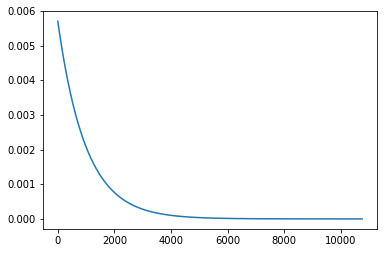

In [73]:
lin_reg_model_red = LinearRegression(Xr, yr, learning_rate = 0.0005, activation="gradient_descent")
lin_reg_model_red

In [77]:
# Load red test file
df6 = pd.read_csv('Files/winequality-red-testing.csv', index_col=0)
df6.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Id,,,,,,,,,,,
0,7.8,0.70,0.06,1.9,0.079,20.0,35,0.99628,3.40,0.69,10.9
1,7.6,0.74,0.00,1.9,0.100,6.0,12,0.99521,3.36,0.59,11.0


In [78]:
Xr_test = df6.values
Xr_test = scaler.fit_transform(Xr_test)

print(Xr_test.shape)

(400, 11)


In [80]:
lin_reg_pred_red = np.dot(lin_reg_model_red[0], Xr_test.T) + lin_reg_model_red[1]
lin_reg_pred_red.shape

(400,)

In [84]:
df7 = pd.read_csv('Files/winequality-red-solution.csv', index_col=0)
df7.head(2)

,quality
Id,
0,0
1,0


In [90]:
df7['quality'] = lin_reg_pred_red

In [91]:
df7.to_csv('winequality-red-pred-using-red-model.csv')

In [92]:
df8=df7

# Red wine prediction using white wine model parameters

In [95]:
lin_reg_pred_red_by_white = np.dot(lin_reg_model[0], Xr_test.T) + lin_reg_model[1]
lin_reg_pred_red_by_white.shape

(400,)

In [96]:
df8['quality'] = lin_reg_pred_red_by_white

In [98]:
df8.to_csv('winequality-red-solution.csv')